# Amplitude estimation circuit

This circuit codes and tests an amplitude estimation circuit based on the algorith given in the Chapter Four of the book Machine Learning with Quantum Computers by Schuld and Petruccione.  The detailed coding can be found in function `my_amplitude_encoding` in the module `quantum_helper_functions`.  The book describes two casades, one using `RZ` rotations to equalise the signs of the amplitudes, and a second cascade using `RY` rotations.  Only the second cascade is coded.

**Caveat**  There are many better implementations available, such as the Pennylane `AmplitudeEmbedding`!  This version was written for my own education.

Implement modules needed

In [1]:
from pathlib import Path
import math
import pennylane as qml

HOME_DIR = '..'
BASE_DIR = Path(HOME_DIR)

import sys
sys.path.append(HOME_DIR)

from src.modules.quantum_helper_functions import make_wires, my_amplitude_encoding

Set up test example given in Chapter Four.

In [2]:
n_qubits = 3
my_wires = make_wires(n_qubits)
dev_unique_wires = qml.device('default.qubit', wires=my_wires)
features = [math.sqrt(0.2), 0, math.sqrt(0.5), 0, 0, 0, math.sqrt(0.2), math.sqrt(0.1)]

Call the function module `my_amplitude_encoding` from within a Pennylane circuit.

In [3]:
@qml.qnode(dev_unique_wires)
def circuit(features):
    my_amplitude_encoding(features, wires=my_wires)
    return qml.state()  # Returns the full quantum state vector

Call the circuit, and print out.  Note that the circuit state matches the input amplitudes above (to within small roundings)

In [4]:
state = circuit(features)
print(state)
print(type(state))

[4.47213595e-01+0.j 0.00000000e+00+0.j 7.07106781e-01+0.j
 0.00000000e+00+0.j 3.35383338e-17+0.j 0.00000000e+00+0.j
 4.47213595e-01+0.j 3.16227766e-01+0.j]
<class 'numpy.ndarray'>


Print out the circuit.  Note that since Pennylane does not seem to support a conditional RY then X gates are used to control the RY gates.

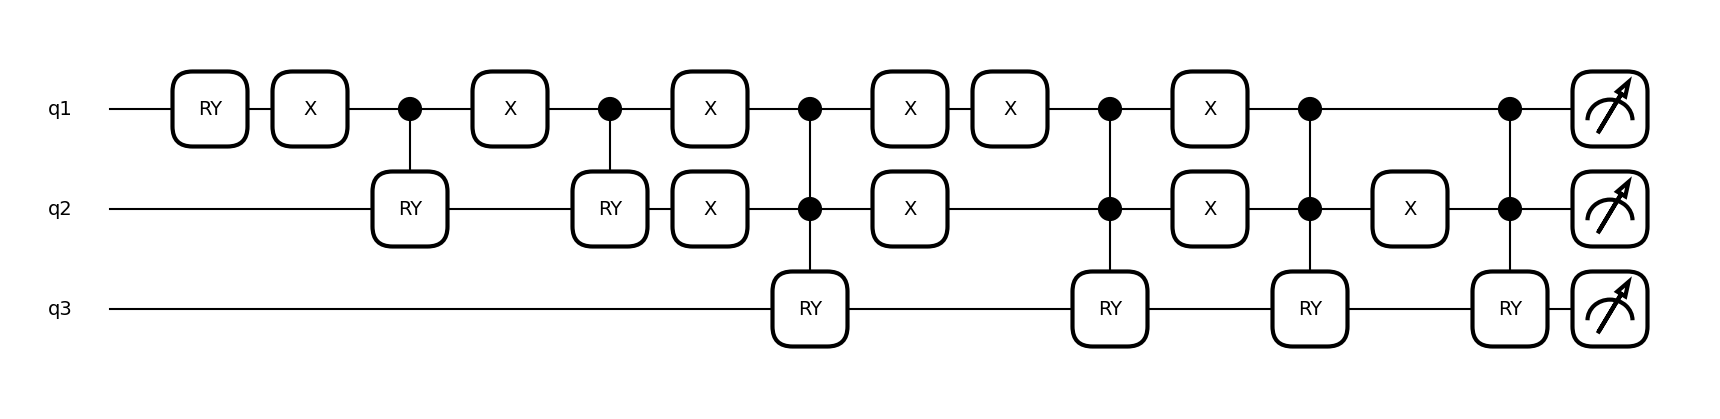

In [5]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)(features)